In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np

In [2]:
df=pd.read_csv('yahoo_stock.csv',sep=',')

In [3]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
1,2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2,2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
3,2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
4,2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107


In [4]:
df.shape

(1825, 7)

In [5]:
df1=df.reset_index()['Close']

In [6]:
df1.head()

0    2086.590088
1    2089.139893
2    2088.870117
3    2088.870117
4    2090.110107
Name: Close, dtype: float64

In [7]:
df1.shape

(1825,)

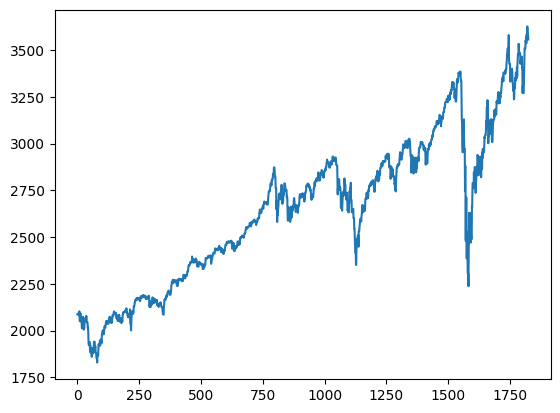

In [8]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [9]:
# LSTM are sensitive to the scale of the data

In [10]:
df1

0       2086.590088
1       2089.139893
2       2088.870117
3       2088.870117
4       2090.110107
           ...     
1820    3626.909912
1821    3609.530029
1822    3567.790039
1823    3581.870117
1824    3557.540039
Name: Close, Length: 1825, dtype: float64

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [12]:
df1

array([[0.14323386],
       [0.14465213],
       [0.14450208],
       ...,
       [0.96711598],
       [0.97494769],
       [0.96141466]])

Train-Test split is done using cross validation or random seed

In [13]:
training_size = int(len(df1)*0.65)
test_size = len(df1)-training_size
train_data,test_data = df1[0:training_size,:],df1[training_size:len(df1),:1]

In [14]:
training_size,test_size

(1186, 639)

In [15]:
#pre processing to check timr steps
import numpy
#convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy .array(dataX), numpy.array(dataY)

In [16]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [17]:
print(x_train.shape), print(y_train.shape)

(1085, 100)
(1085,)


(None, None)

In [18]:
print(x_test.shape), print(y_test.shape)

(538, 100)
(538,)


(None, None)

In [19]:
#3d
# reshape input to be[samples, time steps, features] which is require for LSTM
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1], 1)

In [20]:
#Create the stacked LSTM Model

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [22]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
model.fit(x_train,y_train,validation_data=(x_test, y_test),epochs=50,batch_size=64,verbose=1)

Epoch 1/50
17/17 [==============================] - 14s 298ms/step - loss: 0.0305 - val_loss: 0.0576
Epoch 2/50
17/17 [==============================] - 4s 215ms/step - loss: 0.0041 - val_loss: 0.0276
Epoch 3/50
17/17 [==============================] - 4s 221ms/step - loss: 0.0016 - val_loss: 0.0095
Epoch 4/50
17/17 [==============================] - 3s 181ms/step - loss: 7.9598e-04 - val_loss: 0.0048
Epoch 5/50
17/17 [==============================] - 4s 230ms/step - loss: 7.1771e-04 - val_loss: 0.0050
Epoch 6/50
17/17 [==============================] - 4s 253ms/step - loss: 7.0347e-04 - val_loss: 0.0048
Epoch 7/50
17/17 [==============================] - 4s 252ms/step - loss: 7.1118e-04 - val_loss: 0.0062
Epoch 8/50
17/17 [==============================] - 4s 215ms/step - loss: 7.0677e-04 - val_loss: 0.0050
Epoch 9/50
17/17 [==============================] - 4s 216ms/step - loss: 6.9928e-04 - val_loss: 0.0045
Epoch 10/50
17/17 [==============================] - 4s 213ms/step - loss: 

In [25]:
tf.__version__

'2.13.0'

In [26]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

17/17 [==============================] - 1s 35ms/step


In [27]:
#Transform back to orignal form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [28]:
# calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

2464.747518794984

In [29]:
## Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

3026.2259349161927

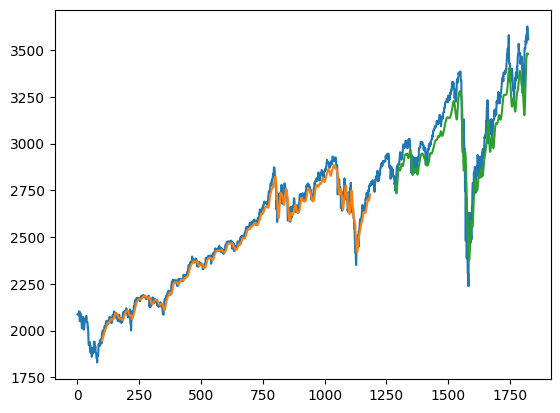

In [30]:
look_back = 100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

#shift test predictions for plotting

testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

#plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [31]:
len(test_data)

639

In [32]:
x_input = test_data[539:].reshape(1, -1)
x_input.shape

(1, 100)

In [33]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [34]:
from numpy import array

lst_output = []
n_steps = 100
i=0
while(i<30):
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
        
print(lst_output)

[0.9103244]
101
1 day input [0.85868529 0.85868529 0.85868529 0.86376914 0.86810216 0.85979774
 0.86572707 0.87220705 0.87220705 0.87220705 0.89118555 0.89804943
 0.91757845 0.92081572 0.93386477 0.93386477 0.93386477 0.92958185
 0.94423276 0.97437476 0.90441262 0.88878261 0.88878261 0.88878261
 0.88878261 0.83587445 0.87320828 0.83996263 0.84095273 0.84095273
 0.84095273 0.86463132 0.87445422 0.86571593 0.84987462 0.82899387
 0.82899387 0.82899387 0.80762927 0.82682464 0.78307738 0.78845618
 0.81730755 0.81730755 0.81730755 0.84686549 0.83789349 0.85320641
 0.86310726 0.84509659 0.84509659 0.84509659 0.87857038 0.85207726
 0.88459978 0.89983489 0.916694   0.916694   0.916694   0.94844343
 0.93604513 0.92310731 0.92014271 0.92040412 0.92040412 0.92040412
 0.88876034 0.89777131 0.89356621 0.90353931 0.91015834 0.91015834
 0.91015834 0.8743263  0.86860271 0.80205031 0.82378767 0.80145511
 0.80145511 0.80145511 0.82385991 0.85663271 0.89794921 0.93522193
 0.93466013 0.93466013 0.93466013 

8 day output [[0.75699246]]
9 day input [0.87220705 0.87220705 0.89118555 0.89804943 0.91757845 0.92081572
 0.93386477 0.93386477 0.93386477 0.92958185 0.94423276 0.97437476
 0.90441262 0.88878261 0.88878261 0.88878261 0.88878261 0.83587445
 0.87320828 0.83996263 0.84095273 0.84095273 0.84095273 0.86463132
 0.87445422 0.86571593 0.84987462 0.82899387 0.82899387 0.82899387
 0.80762927 0.82682464 0.78307738 0.78845618 0.81730755 0.81730755
 0.81730755 0.84686549 0.83789349 0.85320641 0.86310726 0.84509659
 0.84509659 0.84509659 0.87857038 0.85207726 0.88459978 0.89983489
 0.916694   0.916694   0.916694   0.94844343 0.93604513 0.92310731
 0.92014271 0.92040412 0.92040412 0.92040412 0.88876034 0.89777131
 0.89356621 0.90353931 0.91015834 0.91015834 0.91015834 0.8743263
 0.86860271 0.80205031 0.82378767 0.80145511 0.80145511 0.80145511
 0.82385991 0.85663271 0.89794921 0.93522193 0.93466013 0.93466013
 0.93466013 0.95749881 0.95473438 0.96982473 0.94999533 0.97677199
 0.97677199 0.97677199 

16 day output [[0.5977614]]
17 day input [0.93386477 0.92958185 0.94423276 0.97437476 0.90441262 0.88878261
 0.88878261 0.88878261 0.88878261 0.83587445 0.87320828 0.83996263
 0.84095273 0.84095273 0.84095273 0.86463132 0.87445422 0.86571593
 0.84987462 0.82899387 0.82899387 0.82899387 0.80762927 0.82682464
 0.78307738 0.78845618 0.81730755 0.81730755 0.81730755 0.84686549
 0.83789349 0.85320641 0.86310726 0.84509659 0.84509659 0.84509659
 0.87857038 0.85207726 0.88459978 0.89983489 0.916694   0.916694
 0.916694   0.94844343 0.93604513 0.92310731 0.92014271 0.92040412
 0.92040412 0.92040412 0.88876034 0.89777131 0.89356621 0.90353931
 0.91015834 0.91015834 0.91015834 0.8743263  0.86860271 0.80205031
 0.82378767 0.80145511 0.80145511 0.80145511 0.82385991 0.85663271
 0.89794921 0.93522193 0.93466013 0.93466013 0.93466013 0.95749881
 0.95473438 0.96982473 0.94999533 0.97677199 0.97677199 0.97677199
 1.         0.99033286 0.96711598 0.97494769 0.96141466 0.91032439
 0.9011119  0.88750499 

24 day output [[0.5594811]]
25 day input [0.88878261 0.83587445 0.87320828 0.83996263 0.84095273 0.84095273
 0.84095273 0.86463132 0.87445422 0.86571593 0.84987462 0.82899387
 0.82899387 0.82899387 0.80762927 0.82682464 0.78307738 0.78845618
 0.81730755 0.81730755 0.81730755 0.84686549 0.83789349 0.85320641
 0.86310726 0.84509659 0.84509659 0.84509659 0.87857038 0.85207726
 0.88459978 0.89983489 0.916694   0.916694   0.916694   0.94844343
 0.93604513 0.92310731 0.92014271 0.92040412 0.92040412 0.92040412
 0.88876034 0.89777131 0.89356621 0.90353931 0.91015834 0.91015834
 0.91015834 0.8743263  0.86860271 0.80205031 0.82378767 0.80145511
 0.80145511 0.80145511 0.82385991 0.85663271 0.89794921 0.93522193
 0.93466013 0.93466013 0.93466013 0.95749881 0.95473438 0.96982473
 0.94999533 0.97677199 0.97677199 0.97677199 1.         0.99033286
 0.96711598 0.97494769 0.96141466 0.91032439 0.9011119  0.88750499
 0.8702718  0.85030818 0.82841462 0.80523658 0.78128529 0.75699246
 0.73275906 0.7089896

In [35]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [36]:
import matplotlib.pyplot as plt

In [37]:
len(df1)-100

1725

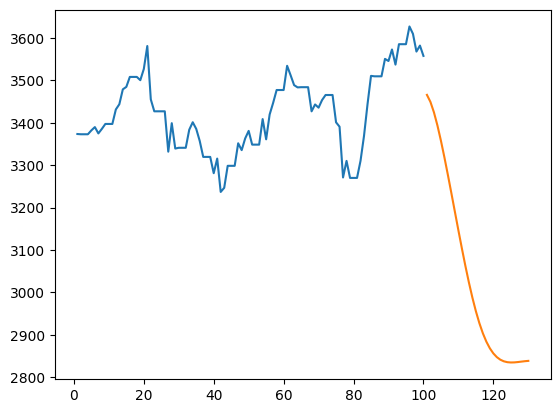

In [38]:
plt.plot(day_new,scaler.inverse_transform(df1[1725:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

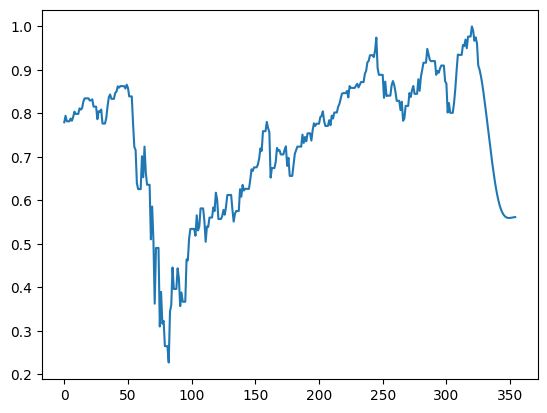

In [39]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1500:])

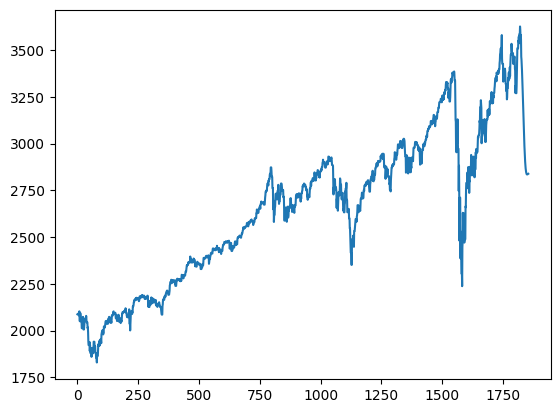

In [40]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)